In [ ]:
#hide
import sys, os
from pathlib import Path

# Insert in Path Project Directory
sys.path.insert(0, str(Path().cwd().parent))

%load_ext autoreload
%autoreload 2 

In [ ]:
#hide
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")    

# RFPYE
> Este módulo tem como objetivo o processamento e extração otimizada de dados dos arquivos `.bin` de monitoramento do espectro provenientes do script Logger executados nas estações de Monitoramento CRFS RFeye Node. Para tal utilizamos as várias funcionalidades da biblioteca [fastcore](https://fastcore.fast.ai/basics.html), que expande e otimiza as estruturas de dados da linguagem python. 

## Instalação

`Ubuntu`: 

```bash
python -m pip install rfpye
```

`Windows`:

Como parte dessa lib utiliza código c compilado com `Cython`, é preciso que um compilador `C` esteja instalado. Em Windows, uma opção é instalar a versão apropriada do Visual Studio seguindo as orientações do site da Microsoft. No entanto uma solução mais simples e a recomendada é utilizando o `conda`.

Primeiramente instale o [miniconda](https://docs.conda.io/en/latest/miniconda.html). Com o conda instalado e disponível no seu `PATH` ou através do `Anaconda Prompt` execute o comando:

```bash
conda install -c intel libpython m2w64-toolchain -y

echo [build] > %CONDA_PREFIX%\Lib\distutils\distutils.cfg

echo compiler = mingw32 >> %CONDA_PREFIX%\Lib\distutils\distutils.cfg
```

Depois disso basta instalar normalmente a lib:
`python -m pip install rfpye`

Em Linux normalmente o sistema já possui o compilador `gcc` instalado então basta executar o comando `pip install` acima.

## Como utilizar
Abaixo mostramos as funcionalidades principais dos módulos, utilizando-os dentro de algum outro script ou `REPL`

Precisamos necessariamente de um diretório de entrada, contendo um ou mais arquivos `.bin`
> Mude os caminhos abaixo para suas pastas locais

In [ ]:
from fastcore.xtras import Path
from rfpye.utils import get_files
from rich import print

A função abaixo baixa alguns arquivos de exemplo:

In [ ]:
path = Path(r'binfiles')
if not path.exists() or not len(get_files(path, extensions=['.bin'])):
    path = Path('.')
    !wget --header 'Host: raw.githubusercontent.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3' --referer 'https://github.com/EricMagalhaesDelgado/SpecFiles/blob/main/Combo3%20(CRFS%20Bin%20-%20DataTypes%204%2C%207%2C%208%2C%2060-65%20e%2067-69)/rfeye002092_210208_T202310_CRFSBINv.5.bin' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://raw.githubusercontent.com/EricMagalhaesDelgado/SpecFiles/main/Combo3%20(CRFS%20Bin%20-%20DataTypes%204%2C%207%2C%208%2C%2060-65%20e%2067-69)/rfeye002092_210208_T202310_CRFSBINv.5.bin' --output-document 'rfeye002092_210208_T202310_CRFSBINv.5.bin'
    !wget --header 'Host: raw.githubusercontent.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3' --referer 'https://github.com/EricMagalhaesDelgado/SpecFiles/blob/main/Combo3%20(CRFS%20Bin%20-%20DataTypes%204%2C%207%2C%208%2C%2060-65%20e%2067-69)/rfeye002092_210208_T203131_CRFSBINv.2.bin' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://raw.githubusercontent.com/EricMagalhaesDelgado/SpecFiles/main/Combo3%20(CRFS%20Bin%20-%20DataTypes%204%2C%207%2C%208%2C%2060-65%20e%2067-69)/rfeye002092_210208_T203131_CRFSBINv.2.bin' --output-document 'rfeye002092_210208_T203131_CRFSBINv.2.bin'
    !wget --header 'Host: raw.githubusercontent.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3' --referer 'https://github.com/EricMagalhaesDelgado/SpecFiles/blob/main/Combo3%20(CRFS%20Bin%20-%20DataTypes%204%2C%207%2C%208%2C%2060-65%20e%2067-69)/rfeye002292_210208_T202215_CRFSBINv.4.bin' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://raw.githubusercontent.com/EricMagalhaesDelgado/SpecFiles/main/Combo3%20(CRFS%20Bin%20-%20DataTypes%204%2C%207%2C%208%2C%2060-65%20e%2067-69)/rfeye002292_210208_T202215_CRFSBINv.4.bin' --output-document 'rfeye002292_210208_T202215_CRFSBINv.4.bin'
    !wget --header 'Host: raw.githubusercontent.com' --user-agent 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3' --referer 'https://github.com/EricMagalhaesDelgado/SpecFiles/blob/main/Combo3%20(CRFS%20Bin%20-%20DataTypes%204%2C%207%2C%208%2C%2060-65%20e%2067-69)/rfeye002292_210208_T203238_CRFSBINv.3.bin' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://raw.githubusercontent.com/EricMagalhaesDelgado/SpecFiles/main/Combo3%20(CRFS%20Bin%20-%20DataTypes%204%2C%207%2C%208%2C%2060-65%20e%2067-69)/rfeye002292_210208_T203238_CRFSBINv.3.bin' --output-document 'rfeye002292_210208_T203238_CRFSBINv.3.bin'


A função `parse_bin` é a função principal que encapsula o processamento dos arquivos bin.

In [ ]:
#hide
from nbdev import show_doc

In [ ]:
from rfpye.parser import parse_bin
show_doc(parse_bin)

<h4 id="parse_bin" class="doc_header"><code>parse_bin</code><a href="https://github.com/ronaldokun/rfpye/tree/master/rfpye/parser.py#L252" class="source_link" style="float:right">[source]</a></h4>

> <code>parse_bin</code>(**`bin_file`**:`Union`\[`str`, `Path`\])

Receives a CRFS binfile and returns a dictionary with the file metadata, a GPS Class and a list with the different Spectrum Classes
A block is a piece of the .bin file with a known start and end and that contains different types of information.
It has several fields: file_type, header, data and footer.
Each field has lengths and information defined in the documentation.
Args:
    bin_file (Union[str, Path]): path to the bin file

Returns:
    Dictionary with the file metadata, file_version, string info, gps and spectrum blocks.

## CRFS Bin - Versão 5
Vamos listar arquivos da última versão do script Logger, Versão 5

In [ ]:
files = get_files(r'D:\OneDrive - ANATEL\Sensores', extensions=['.bin'])
files

(#65) [Path('D:/OneDrive - ANATEL/Sensores/rfeye002073/rfeye002073_210620_T231206.bin'),Path('D:/OneDrive - ANATEL/Sensores/rfeye002080/rfeye002080_691231_T210111.bin'),Path('D:/OneDrive - ANATEL/Sensores/rfeye002081/rfeye002081_210620_T232204.bin'),Path('D:/OneDrive - ANATEL/Sensores/rfeye002083/rfeye002083_210621_T160001.bin'),Path('D:/OneDrive - ANATEL/Sensores/rfeye002084/rfeye002084_210623_T144012.bin'),Path('D:/OneDrive - ANATEL/Sensores/rfeye002086/rfeye002086_210622_T004723.bin'),Path('D:/OneDrive - ANATEL/Sensores/rfeye002087/rfeye002087_210628_T224301.bin'),Path('D:/OneDrive - ANATEL/Sensores/RFeye002090-VCP/rfeye002090-VCP_210623_T024236.bin'),Path('D:/OneDrive - ANATEL/Sensores/rfeye002091/rfeye002091_210618_T145747.bin'),Path('D:/OneDrive - ANATEL/Sensores/rfeye002092/rfeye002092_210603_T205009.bin')...]

In [ ]:
file = files.shuffle()[0]

In [ ]:
%%time
v5 = parse_bin(file)

Wall time: 10.7 s


In [ ]:
print(v5)

{
    'filename': 'rfeye002113_210626_T120001.bin',
    'file_version': 23,
    'string': 'CRFS DATA FILE V023',
    'hostname': 'rfeye002113',
    'method': 'ScriptRFeye2021_v2.cfg',
    'unit_info': 'Stationary',
    'file_number': 0,
    'identifier': 'INFO',
    'gps': GPS Data - Median of Coordinates: -14.81416:-39.03184, Altitude: 14.50 
#Satellites: 12.0 ,
    'spectrum': [SpecData(type=67, thread_id=300, description='PMEC 2021 (Faixa 1 de 10).', 
start_mega=105.0, stop_mega=140.0, unit='dBm', ndata=3584, bw=18457, processing='peak', 
antenna_id=0, thresh=-147.5, minimum=-147.5), SpecData(type=67, thread_id=310, 
description='PMEC 2021 (Faixa 2 de 10).', start_mega=155.0, stop_mega=165.0, unit='dBm', 
ndata=1024, bw=18457, processing='peak', antenna_id=0, thresh=-147.5, minimum=-147.5), 
SpecData(type=67, thread_id=100, description='PRD 2021 (Faixa principal 1 de 4).', 
start_mega=50.0, stop_mega=90.0, unit='dBμV/m', ndata=1024, bw=73828, processing='peak', 
antenna_id=0, thresh=-90.5, minimum=-90.5), SpecData(type=67, thread_id=110, description='PRD
2021 (Faixa principal 2 de 4).', start_mega=70.0, stop_mega=110.0, unit='dBμV/m', ndata=1024,
bw=73828, processing='peak', antenna_id=0, thresh=-67.5, minimum=-67.5), SpecData(type=67, 
thread_id=120, description='PRD 2021 (Faixa principal 3 de 4).', start_mega=170.0, 
stop_mega=220.0, unit='dBμV/m', ndata=1280, bw=73828, processing='peak', antenna_id=0, 
thresh=-37.5, minimum=-37.5), SpecData(type=67, thread_id=130, description='PRD 2021 (Faixa 
principal 4 de 4).', start_mega=470.0, stop_mega=700.0, unit='dBμV/m', ndata=5888, bw=73828, 
processing='peak', antenna_id=0, thresh=-41.5, minimum=-41.5), SpecData(type=67, 
thread_id=200, description='PMEF 2021 (Faixa 1 de 6).', start_mega=700.0, stop_mega=960.0, 
unit='dBm', ndata=6656, bw=73828, processing='peak', antenna_id=0, thresh=-147.5, 
minimum=-147.5), SpecData(type=67, thread_id=210, description='PMEF 2021 (Faixa 2 de 6).', 
start_mega=1710.0, stop_mega=1980.0, unit='dBm', ndata=6912, bw=73828, processing='peak', 
antenna_id=0, thresh=-147.5, minimum=-147.5), SpecData(type=67, thread_id=220, 
description='PMEF 2021 (Faixa 3 de 6).', start_mega=2100.0, stop_mega=1002168.999, 
unit='dBm', ndata=1792, bw=73828, processing='peak', antenna_id=0, thresh=-147.5, 
minimum=-147.5), SpecData(type=67, thread_id=230, description='PMEF 2021 (Faixa 4 de 6).', 
start_mega=2290.0, stop_mega=2390.0, unit='dBm', ndata=2560, bw=73828, processing='peak', 
antenna_id=0, thresh=-147.5, minimum=-147.5), SpecData(type=67, thread_id=240, 
description='PMEF 2021 (Faixa 5 de 6).', start_mega=2500.0, stop_mega=2690.0, unit='dBm', 
ndata=4864, bw=73828, processing='peak', antenna_id=0, thresh=-147.5, minimum=-147.5), 
SpecData(type=67, thread_id=250, description='PMEF 2021 (Faixa 6 de 6).', start_mega=3290.0, 
stop_mega=3700.0, unit='dBm', ndata=10496, bw=73828, processing='peak', antenna_id=0, 
thresh=-147.5, minimum=-147.5), SpecData(type=67, thread_id=320, description='PMEC 2021 
(Faixa 3 de 10).', start_mega=320.0, stop_mega=340.0, unit='dBm', ndata=512, bw=73828, 
processing='peak', antenna_id=0, thresh=-147.5, minimum=-147.5), SpecData(type=67, 
thread_id=330, description='PMEC 2021 (Faixa 4 de 10).', start_mega=400.0, stop_mega=410.0, 
unit='dBm', ndata=256, bw=73828, processing='peak', antenna_id=0, thresh=-147.5, 
minimum=-147.5), SpecData(type=67, thread_id=340, description='PMEC 2021 (Faixa 5 de 10).', 
start_mega=960.0, stop_mega=1001218.999, unit='dBm', ndata=6656, bw=73828, processing='peak',
antenna_id=0, thresh=-147.5, minimum=-147.5), SpecData(type=67, thread_id=350, 
description='PMEC 2021 (Faixa 6 de 10).', start_mega=1001388.999, stop_mega=1001428.999, 
unit='dBm', ndata=1280, bw=73828, processing='peak', antenna_id=0, thresh=-147.5, 
minimum=-147.5), SpecData(type=67, thread_id=360, description='PMEC 2021 (Faixa 7 de 10).', 
start_mega=1530.0, stop_mega=1001648.999, unit='dBm', ndata=3072, bw=73828, 
processing='peak', antenn

A saída da função é um dicionário, com os metadados do arquivo:

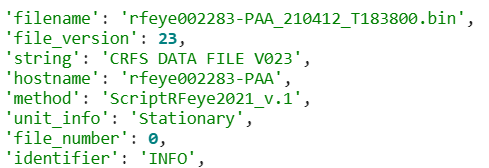

No entanto as duas chaves mais importantes do dicionário retornado são `gps` e `spectrum`

In [ ]:
from rfpye.utils import getattrs
print(getattrs(v5['gps']))

{'altitude': 14.5, 'latitude': -14.814161, 'longitude': -39.031841, 'num_satellites': 12.0}

Se você imprimir a classe retornada pela chave `gps` é retornado um resumo dos seus atributos:

In [ ]:
print(v5['gps'])

GPS Data - Median of Coordinates: -14.81416:-39.03184, Altitude: 14.50 #Satellites: 12.0

Os atributos listados são os valores consolidados por meio da __mediana__ dos diversos blocos de GPS do arquivo. Caso desejar a lista original de valores, os atributos são os mesmos mas precedidos de `_`, o que os torna __atributos privados__ em python, isso somente quer dizer que não são explicitados em algus métodos como `getattrs`, pois normalmente não são acessíveis diretamente, mas nada impede que sejam acessados.

In [ ]:
v5['gps']._latitude, v5['gps']._longitude, v5['gps']._altitude, v5['gps']._num_satellites 

((#9060) [-14.814147,-14.814149,-14.814145,-14.814156,-14.814157,-14.814146,-14.814143,-14.814154,-14.814155,-14.814156...],
 (#9060) [-39.031852,-39.031857,-39.031859,-39.031857,-39.031851,-39.031846,-39.031839,-39.031822,-39.031811,-39.031814...],
 (#9060) [25.5,23.8,25.1,22.5,24.6,26.8,26.6,23.3,25.4,23.7...],
 (#9060) [12,12,12,12,12,12,12,12,12,12...])

Cada arquivo bin normalmente possui vários fluxos de espectro distintos, cada fluxo espectral é uma classe Python, na chave `spectrum` é retornado uma lista com todos os fluxos de espectro.
vamos investigar alguns deles:

In [ ]:
fluxo = v5['spectrum'][0]

Ao imprimir um fluxo é mostrado informações mínimas sobre o seu conteúdo:

In [ ]:
print(fluxo)

Blocks of Type : 67, Thread_id: 300 and Span 105.0 MHz - 140.0 MHz

A função `repr` retorna uma representação com todos os metadados do fluxo:

In [ ]:
repr(fluxo)

"SpecData(type=67, thread_id=300, description='PMEC 2021 (Faixa 1 de 10).', start_mega=105.0, stop_mega=140.0, unit='dBm', ndata=3584, bw=18457, processing='peak', antenna_id=0, thresh=-147.5, minimum=-147.5)"

No entanto o principal atributo de um fluxo de espectro são os valores de nível medidos:

In [ ]:
print(fluxo.levels)

[[-112.5 -117.  -111.  ... -106.  -105.   -99.5]
 [-111.5 -115.5 -116.5 ... -103.  -101.5 -101. ]
 [-116.5 -113.  -113.5 ... -105.5 -103.5 -105. ]
 ...
 [-113.  -111.5 -111.5 ...  -99.5 -101.5  -98.5]
 [-126.  -124.  -116.  ...  -97.   -97.5  -98.5]
 [-108.5 -110.5 -111.5 ...  -98.   -97.5 -103.5]]

In [ ]:
print(f'Formato da matriz com os níveis: {fluxo.levels.shape}')

Formato da matriz com os níveis: (8715, 3584)

O nº de linhas da matriz nos dá o número de pontos daquele dado fluxo e as colunas o número de traços no qual o Span foi dividido. 

O atributo anterior retorna uma `numpy.ndarray`, um formato eficiente para processamento. No entanto temos adicionalmente o método `.matrix()` que retorna a matriz de dados como um _Pandas Dataframe_ formatada com a data da medição de cada traço. 

In [ ]:
fluxo.matrix()

Frequencies,105.000000,105.009768,105.019537,105.029305,105.039073,105.048842,105.058610,105.068378,105.078147,105.087915,...,139.912085,139.921853,139.931622,139.941390,139.951158,139.960927,139.970695,139.980463,139.990232,140.000000
Time,,,,,,,,,,,,,,,,,,,,,
2021-06-26 12:01:00.731405,-112.5,-117.0,-111.0,-111.5,-117.0,-115.5,-109.5,-111.0,-114.5,-110.5,...,-90.5,-82.0,-81.0,-87.0,-98.0,-100.0,-103.5,-106.0,-105.0,-99.5
2021-06-26 12:02:00.731287,-111.5,-115.5,-116.5,-112.5,-107.0,-107.5,-111.0,-115.0,-116.5,-109.0,...,-105.5,-101.0,-99.0,-98.0,-99.0,-105.0,-103.5,-103.0,-101.5,-101.0
2021-06-26 12:03:00.731107,-116.5,-113.0,-113.5,-109.5,-107.5,-108.5,-111.5,-111.5,-111.5,-111.0,...,-101.5,-104.0,-103.0,-100.0,-98.5,-99.0,-113.5,-105.5,-103.5,-105.0
2021-06-26 12:04:00.731401,-111.5,-112.0,-110.0,-110.5,-109.0,-109.5,-113.0,-117.0,-120.0,-114.0,...,-101.5,-101.5,-104.0,-100.0,-100.5,-103.5,-103.5,-109.5,-114.5,-106.5
2021-06-26 12:05:00.731532,-113.0,-115.0,-117.5,-110.0,-111.0,-115.5,-111.0,-112.0,-112.0,-111.0,...,-109.0,-100.5,-96.0,-97.5,-103.5,-105.0,-102.5,-101.5,-101.0,-99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02 18:56:00.731317,-113.0,-111.5,-111.0,-110.0,-105.5,-110.0,-116.5,-110.5,-108.5,-107.5,...,-101.5,-102.5,-101.0,-102.5,-99.0,-96.0,-97.0,-104.0,-100.5,-102.5
2021-07-02 18:57:00.731239,-108.0,-111.5,-110.5,-107.0,-105.5,-111.5,-115.0,-113.0,-109.5,-108.5,...,-90.5,-82.5,-81.5,-88.5,-105.0,-99.5,-99.5,-101.0,-101.0,-98.5
2021-07-02 18:58:00.731138,-113.0,-111.5,-111.5,-109.5,-109.0,-115.0,-106.0,-106.0,-113.0,-116.5,...,-90.5,-83.0,-83.5,-93.0,-95.5,-95.0,-99.5,-99.5,-101.5,-98.5


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(fluxo.matrix().stack(), columns=['Levels']).reset_index() ; df.head()

,Time,Frequencies,Levels
0,2021-06-26 12:01:00.731405,105.000000,-112.5
1,2021-06-26 12:01:00.731405,105.009768,-117.0
2,2021-06-26 12:01:00.731405,105.019537,-111.0
3,2021-06-26 12:01:00.731405,105.029305,-111.5
4,2021-06-26 12:01:00.731405,105.039073,-117.0


In [ ]:
from math import pi
from bokeh.io import show, output_notebook, export_svg
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure, save, output_file
output_notebook()

[autoreload of jinja2.environment failed: Traceback (most recent call last):
  File "C:\Users\rsilva\Miniconda3\envs\rfpye\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\rsilva\Miniconda3\envs\rfpye\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\rsilva\Miniconda3\envs\rfpye\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\rsilva\Miniconda3\envs\rfpye\lib\site-packages\IPython\extensions\autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "C:\Users\rsilva\Miniconda3\envs\rfpye\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\rsilva\Miniconda3\envs\rfpye\lib\site-packages\IPython\extensions\autoreload.py", line 302, in update_class
    if upda

Loading BokehJS ...

In [ ]:
# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=df.Levels.min(), high=df.Levels.max())

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title="Waterfall ({0} - {1})".format(tempo[0], tempo[-1]),
           x_range=frequencias, y_range=tempo,
           x_axis_label = 'Frequências',
           y_axis_label = 'Tempo',
           x_axis_location="above", plot_width=1080, plot_height=720,
           tools=TOOLS, toolbar_location='below',
           tooltips=[('Frequência', '@Frequencies'), ('Tempo', '@Time'), ('Nível', '@Levels')])

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "0px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="Frequencies", 
       y="Time", 
       width=1,
       height=1, 
       source=df,
       fill_color={'field': 'Levels', 'transform': mapper}, 
       line_color=None)



color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="10px",
                 ticker=BasicTicker(desired_num_ticks=len(colors)),
                 formatter=PrintfTickFormatter(format="%ddBm"),
                 label_standoff=6, border_line_color=None)

p.add_layout(color_bar, 'right')

show(p)   # plot is too big to show